### Time series filtering
This notebook demonstrates the working of the following algorithms:  
* Moving Average filter
* Exponential Moving Average filter
* One Euro filter

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from src.time_series_filtering import (
    MovingAverageFilter, 
    ExponentialMovingAverageFilter,
    OneEuroFilter
)


RANDOM_SEED = 42
FONT_SCALE = 1.5
PALETTE = 'bright'
LINE_WIDTH = 3
POINTS_SIZE = 20
FIG_SIZE = (15, 8)
N_POINTS = 450
START_POINT = 0
STOP_POINT = 15
NOISE_SCALE_FACTOR = 0.3
OUTPUT_PATH = 'images'

np.random.seed(RANDOM_SEED)
sns.set(font_scale=FONT_SCALE)
sns.set_palette(PALETTE)

In /home/vladislav/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/vladislav/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/vladislav/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/vladislav/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/vladislav/.local/lib/python3.6/site-packages/matplo

#### Visualization functins

In [2]:
def visualize_data(time, original, noised, close=True):
    
    fig, ax1 = plt.subplots(figsize=FIG_SIZE)
    ax2 = sns.lineplot(x=time, y=original, linewidth=LINE_WIDTH, label='original')
    ax3 = sns.scatterplot(x=time, y=noised, s=POINTS_SIZE, color='red', label='noised')
    
    plt.legend(loc='lower left')
        
    if close:
        plt.close()
    
    return fig


def visualize_moving_average_filter(time, original, noised, w):
    moving_average_filter = MovingAverageFilter(filter_window_size=w)
    filtered = [moving_average_filter(value) for value in noised]
    
    fig = visualize_data(time, original, noised, close=False)
    ax = sns.lineplot(x=time, y=filtered, color='green', 
                       linewidth=LINE_WIDTH, label=f'MA (w={w})')
    
    plt.legend(loc='lower left') 
    plt.close()
    
    return fig


def visualize_exponential_moving_average_filter(time, original, noised, alpha):
    exponential_moving_average_filter = ExponentialMovingAverageFilter(alpha=alpha)
    filtered = [exponential_moving_average_filter(value) for value in noised]
    
    fig = visualize_data(time, original, noised, close=False)
    ax = sns.lineplot(x=time, y=filtered, color='green', 
                       linewidth=LINE_WIDTH, label=f'EMA (alpha={alpha})')
    
    plt.legend(loc='lower left')
    plt.close()
    
    return fig


def visualize_one_euro_filter(time, original, noised, f_cmin, beta):
    one_euro_filter = OneEuroFilter(data_frequency=N_POINTS/STOP_POINT, 
                                    min_cutoff_frequency=f_cmin, beta=beta)
    filtered = [one_euro_filter(value, timestamp) for value, timestamp in zip(noised, time)]

    fig = visualize_data(time, original, noised, close=False)
    ax = sns.lineplot(x=time, y=filtered, color='green', 
                       linewidth=LINE_WIDTH, label=f'1euro (f_cmin={f_cmin}, beta={beta})')
    
    plt.legend(loc='lower left')
    plt.close()
    
    return fig

#### Generating and visualizing data

In [3]:
linspace = np.linspace(start=START_POINT, stop=STOP_POINT, num=N_POINTS, endpoint=False)
noise = np.random.normal(scale=NOISE_SCALE_FACTOR, size=(N_POINTS,))

original_data = np.sin(linspace)
noised_data = original_data + noise

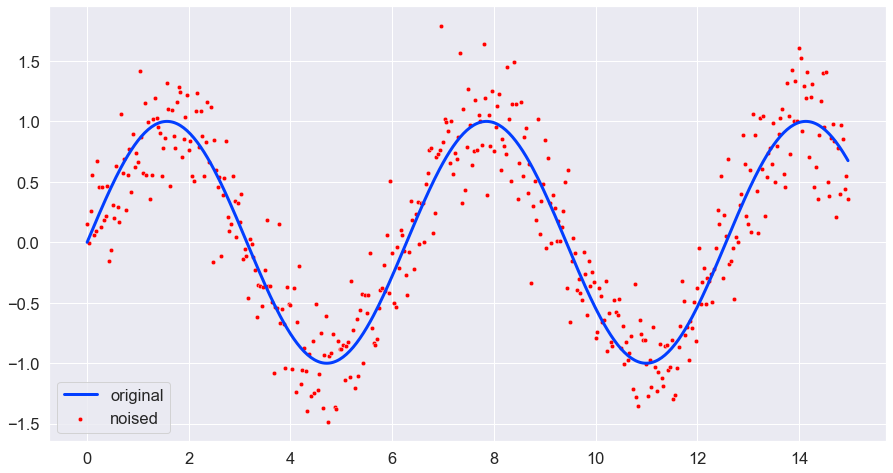

In [4]:
fig = visualize_data(linspace, original_data, noised_data)
fig.savefig(Path(OUTPUT_PATH) / 'data.png', bbox_inches='tight')
fig

#### Visualizing Moving Average filter

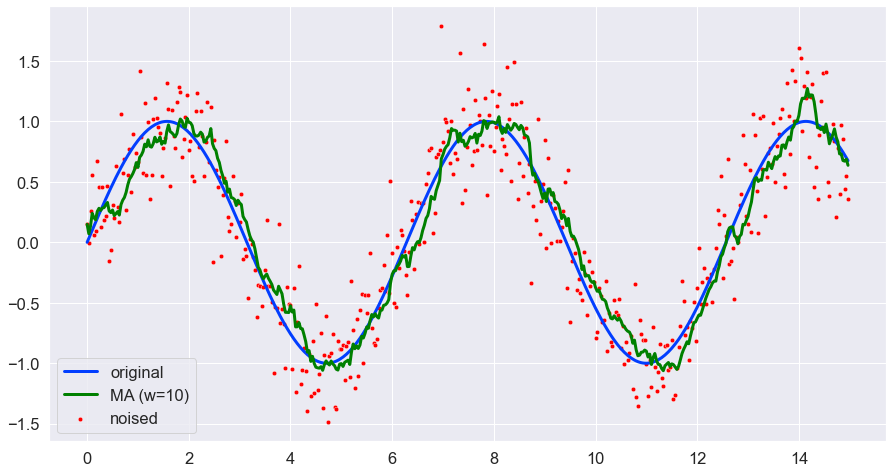

In [5]:
fig = visualize_moving_average_filter(linspace, original_data, noised_data, 10)
fig.savefig(Path(OUTPUT_PATH) / f'moving-average-w-{10}.png', bbox_inches='tight')
fig

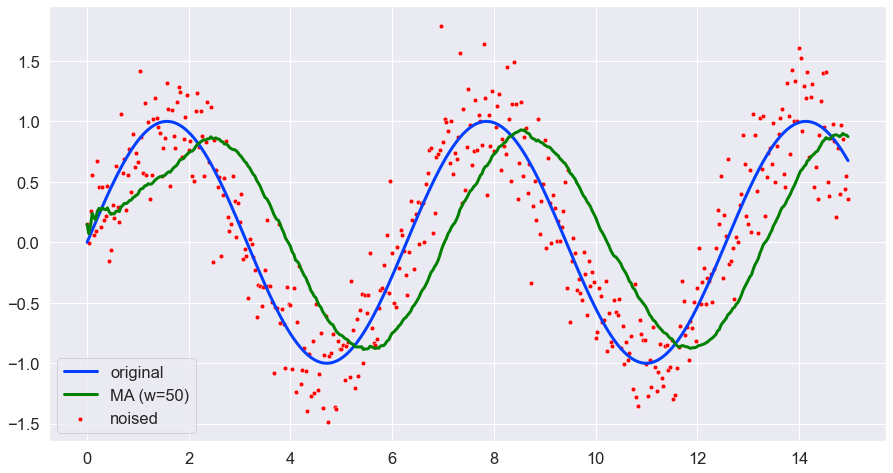

In [6]:
fig = visualize_moving_average_filter(linspace, original_data, noised_data, 50)
fig.savefig(Path(OUTPUT_PATH) / f'moving-average-w-{50}.png', bbox_inches='tight')
fig

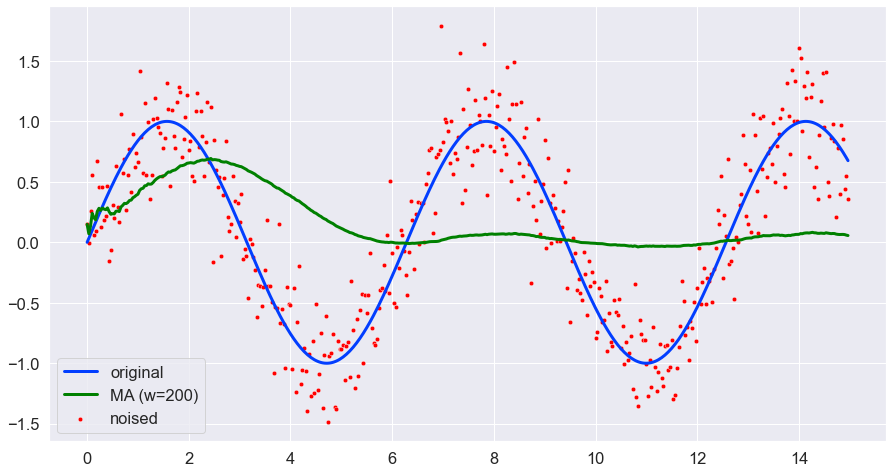

In [7]:
fig = visualize_moving_average_filter(linspace, original_data, noised_data, 200)
fig.savefig(Path(OUTPUT_PATH) / f'moving-average-w-{200}.png', bbox_inches='tight')
fig

#### Visualizing Exponential Moving Average filter

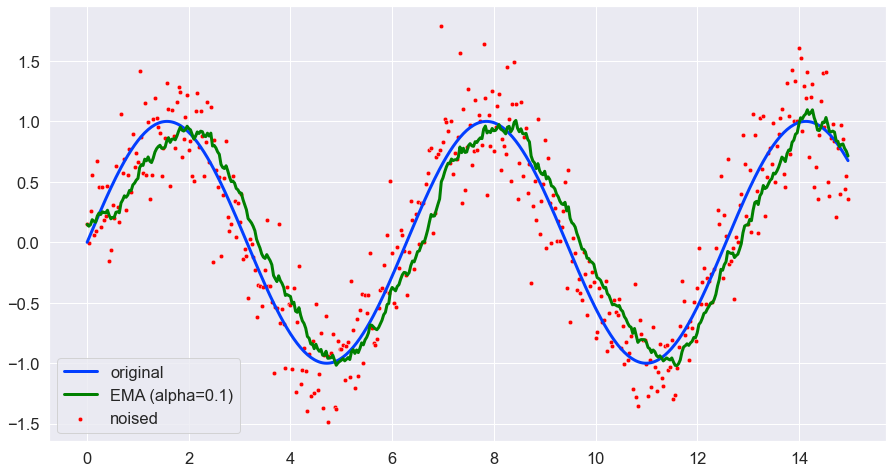

In [8]:
fig = visualize_exponential_moving_average_filter(linspace, original_data, noised_data, 0.1)
fig.savefig(Path(OUTPUT_PATH) / f'exponential-moving-average-alpha-{0.1}.png', bbox_inches='tight')
fig

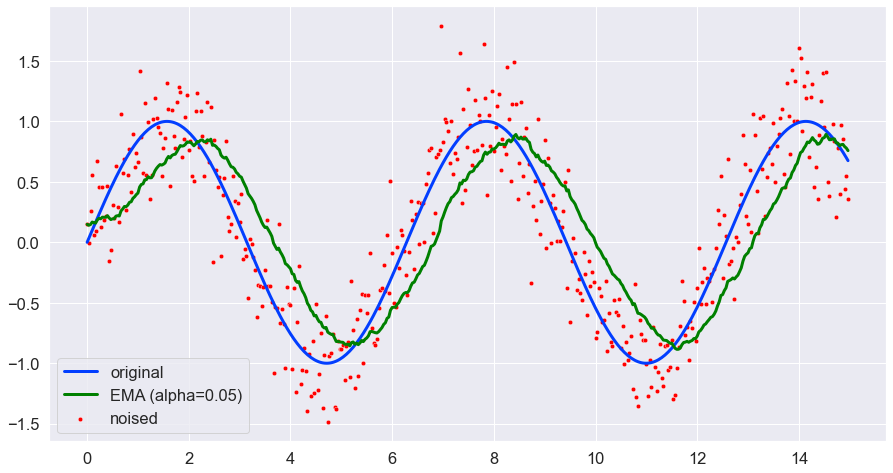

In [9]:
fig = visualize_exponential_moving_average_filter(linspace, original_data, noised_data, 0.05)
fig.savefig(Path(OUTPUT_PATH) / f'exponential-moving-average-alpha-{0.05}.png', bbox_inches='tight')
fig

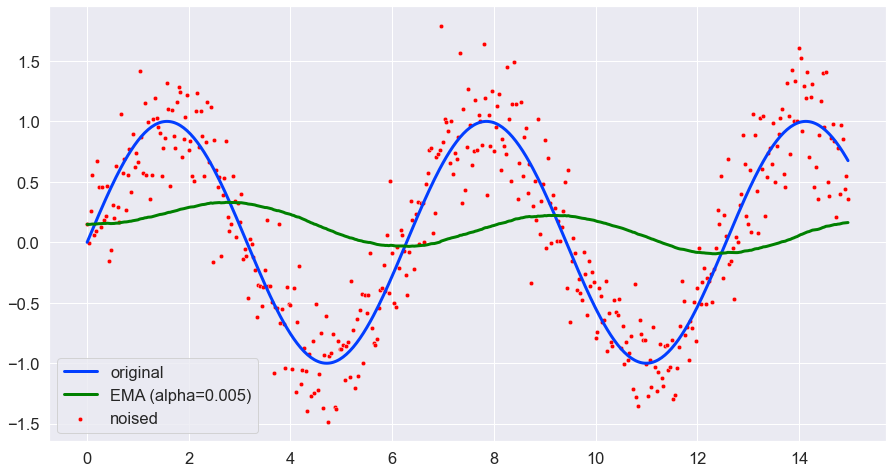

In [10]:
fig = visualize_exponential_moving_average_filter(linspace, original_data, noised_data, 0.005)
fig.savefig(Path(OUTPUT_PATH) / f'exponential-moving-average-alpha-{0.005}.png', bbox_inches='tight')
fig

#### Visualizing One Euro flter

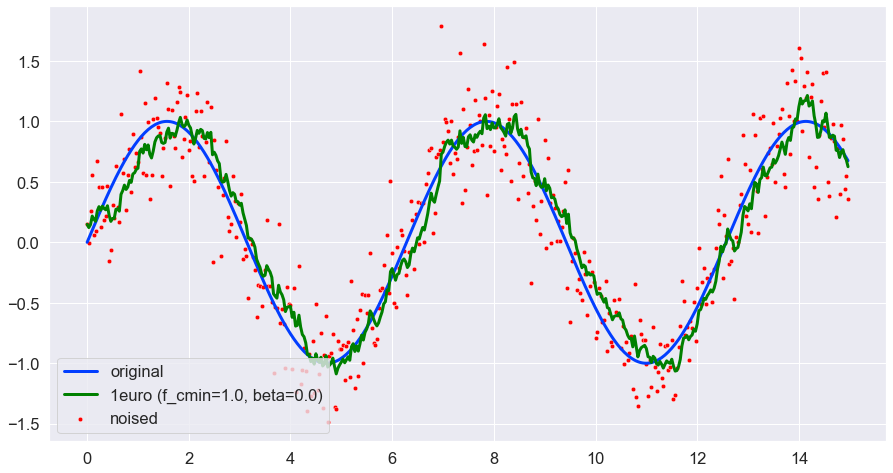

In [11]:
fig = visualize_one_euro_filter(linspace, original_data, noised_data, 1.0, 0.0)
fig.savefig(Path(OUTPUT_PATH) / f'one-euro-f_cmin-{1.0}-beta-{0.0}.png', bbox_inches='tight')    
fig

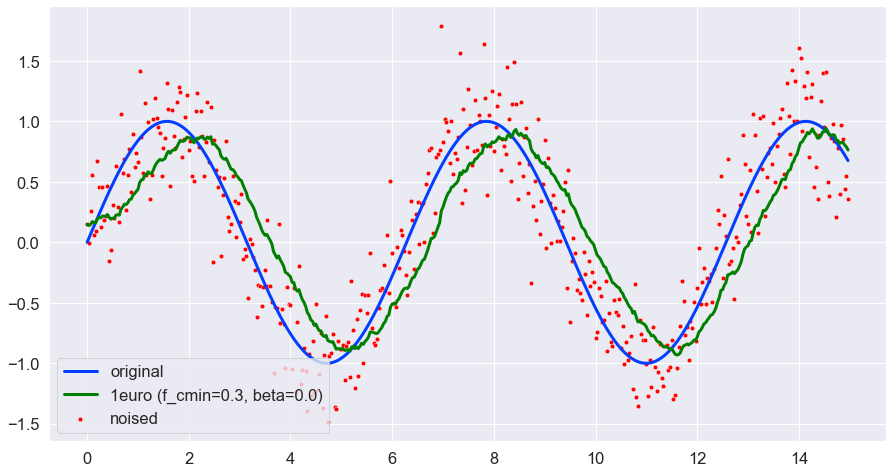

In [12]:
fig = visualize_one_euro_filter(linspace, original_data, noised_data, 0.3, 0.0)
fig.savefig(Path(OUTPUT_PATH) / f'one-euro-f_cmin-{0.3}-beta-{0.0}.png', bbox_inches='tight')    
fig

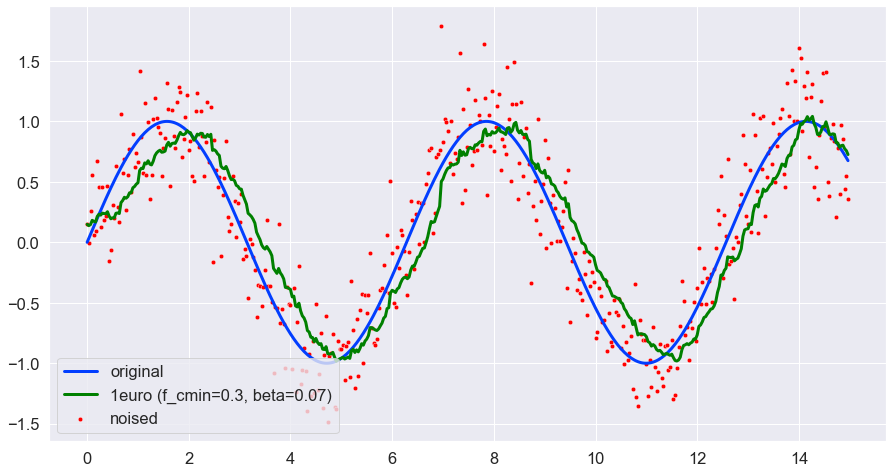

In [13]:
fig = visualize_one_euro_filter(linspace, original_data, noised_data, 0.3, 0.07)
fig.savefig(Path(OUTPUT_PATH) / f'one-euro-f_cmin-{0.3}-beta-{0.07}.png', bbox_inches='tight')    
fig

##### Generating and Visualizing data with dynamic frequency

In [14]:
logspace = np.logspace(start=START_POINT, stop=STOP_POINT, num=N_POINTS, endpoint=False, base=1.2)
noise = np.random.normal(scale=NOISE_SCALE_FACTOR, size=(N_POINTS,))

original_data_dynamic_frequency = np.sin(logspace)
noised_data_dynamic_frequency = original_data_dynamic_frequency + noise

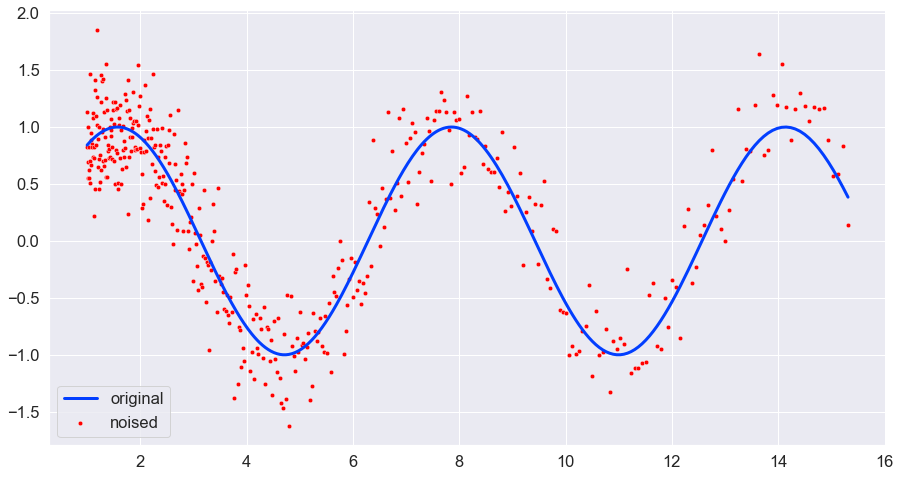

In [15]:
fig = visualize_data(logspace, original_data_dynamic_frequency, noised_data_dynamic_frequency)
fig.savefig(Path(OUTPUT_PATH) / 'data-dynamic-frequency.png', bbox_inches='tight')
fig

#### Visualizing filters for data with dynamic frequency

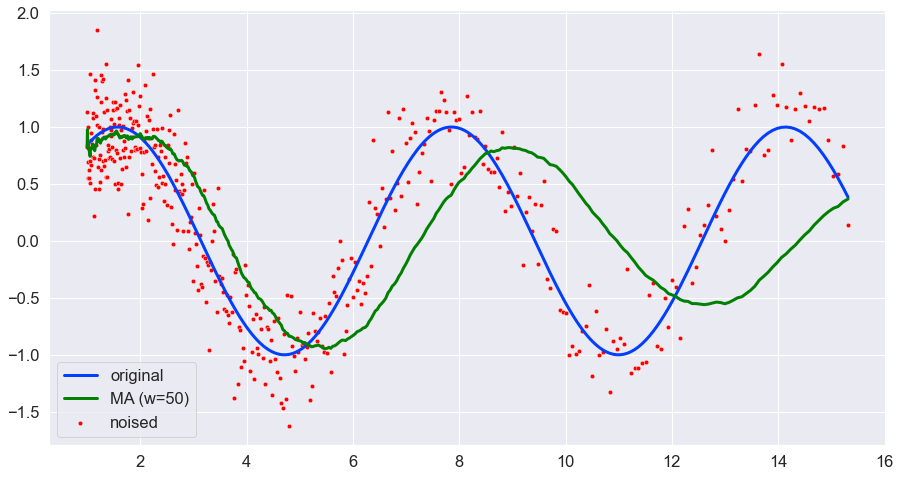

In [16]:
fig = visualize_moving_average_filter(logspace, original_data_dynamic_frequency, 
                                      noised_data_dynamic_frequency, 50)
fig.savefig(Path(OUTPUT_PATH) / f'moving-average-w-{50}-dynamic-frequency.png', 
            bbox_inches='tight')
fig

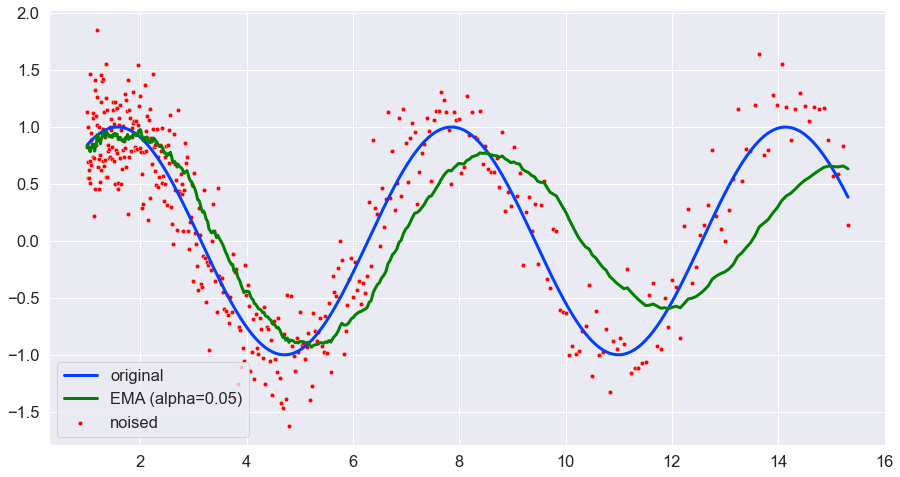

In [17]:
fig = visualize_exponential_moving_average_filter(logspace, original_data_dynamic_frequency, 
                                                  noised_data_dynamic_frequency, 0.05)
fig.savefig(Path(OUTPUT_PATH) / f'exponential-moving-average-alpha-{0.05}-dynamic-frequency.png', 
            bbox_inches='tight')
fig

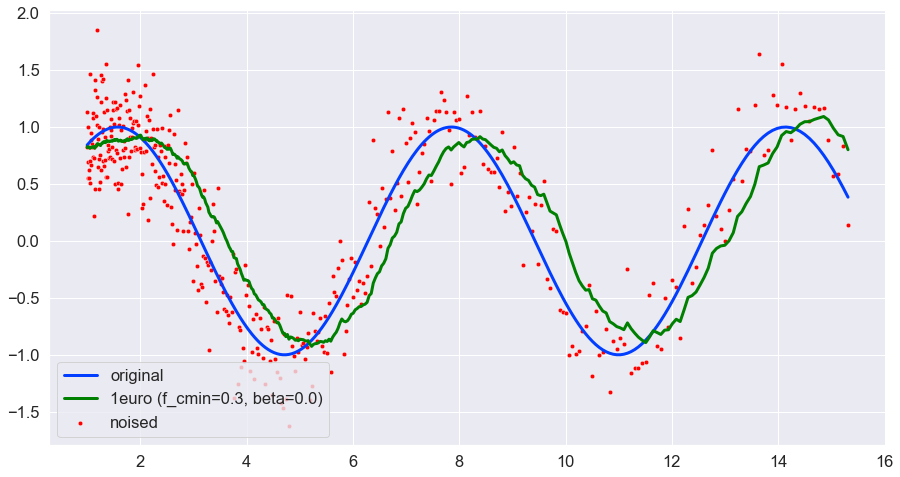

In [18]:
fig = visualize_one_euro_filter(logspace, original_data_dynamic_frequency, 
                                noised_data_dynamic_frequency, 0.3, 0.0)
fig.savefig(Path(OUTPUT_PATH) / f'one-euro-f_cmin-{0.3}-beta-{0.0}-dynamic-frequency.png', 
            bbox_inches='tight')   
fig

# Мусорка

In [34]:
# generate data
n_points = 450
start = 0
stop = 15
scale = 0.3

linspace = np.logspace(start=start, stop=stop, num=n_points, endpoint=False, base=1.2)
noise = np.random.normal(scale=scale, size=(n_points,))
original_function = np.sin(linspace)

noised_func = original_function + noise

/home/vladislav/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

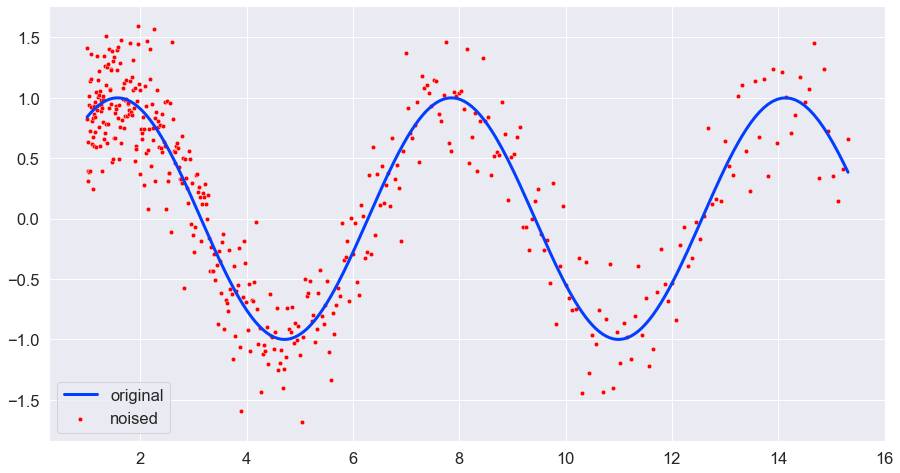

In [35]:
f, ax = plt.subplots(figsize=(15,8))
sns.lineplot(x=linspace, y=original_function, linewidth=3, label='original')
sns.scatterplot(linspace, noised_func, s=20, color='red', label='noised')

In [46]:
# MeanTimeSeriesFilter
ws = 20
mean_time_series_filter = MovingAverageFilter(filter_window_size=ws)

In [47]:
result = []
for value in noised_func:
    filtred_value = mean_time_series_filter(value)
    result.append(filtred_value)

/home/vladislav/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


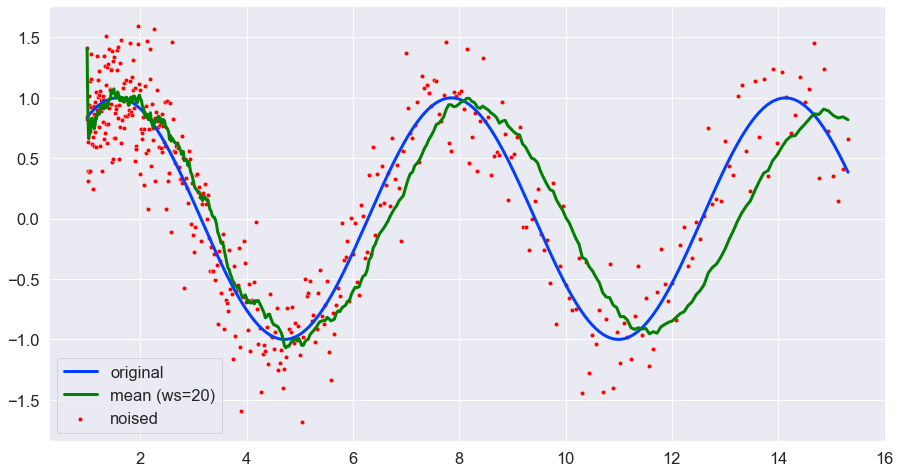

In [48]:
f, ax = plt.subplots(figsize=(15,8))
ax = sns.lineplot(x=linspace, y=original_function, linewidth=3, label='original')
ax1 = sns.scatterplot(linspace, noised_func, s=20, color='red', label='noised')
ax2 = sns.lineplot(x=linspace, y=result, color='green', linewidth=3, label=f'mean (ws={ws})')

In [39]:
# ExponentialMovingAverageFilter
alpha = 0.05
exponential_moving_average_filter = ExponentialMovingAverageFilter(alpha=alpha)

result = []
for value, timestamp in zip(noised_func, linspace):
    filtred_value = exponential_moving_average_filter(value)
    result.append(filtred_value)

/home/vladislav/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


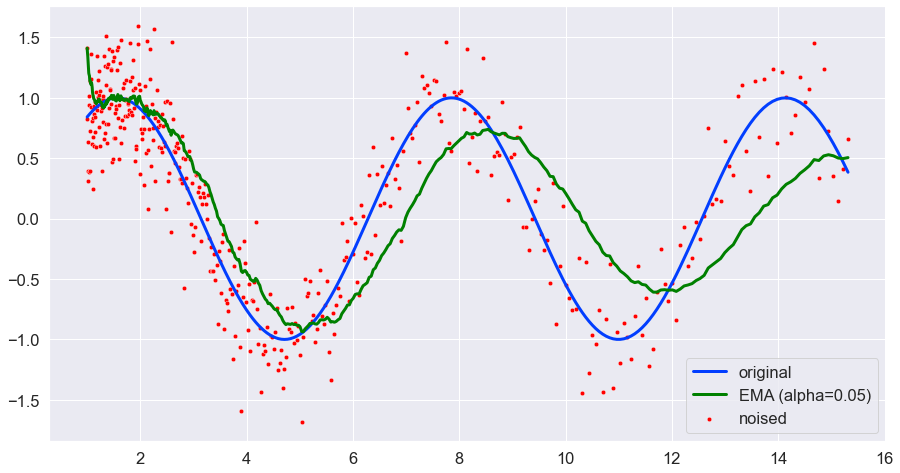

In [40]:
f, ax = plt.subplots(figsize=(15,8))
ax = sns.lineplot(x=linspace, y=original_function, linewidth=3, label='original')
ax1 = sns.scatterplot(linspace, noised_func, s=20, color='red', label='noised')
ax2 = sns.lineplot(x=linspace, y=result, color='green', linewidth=3, label=f'EMA (alpha={alpha})')

In [41]:
# OneEuroFilter
cutoff = 0.5
beta = 0
one_euro_filter = OneEuroFilter(data_frequency=n_points/stop, min_cutoff_frequency=cutoff, beta=beta)

result = []
for value, timestamp in zip(noised_func, linspace):
    filtred_value = one_euro_filter(value, timestamp)
    result.append(filtred_value)

/home/vladislav/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


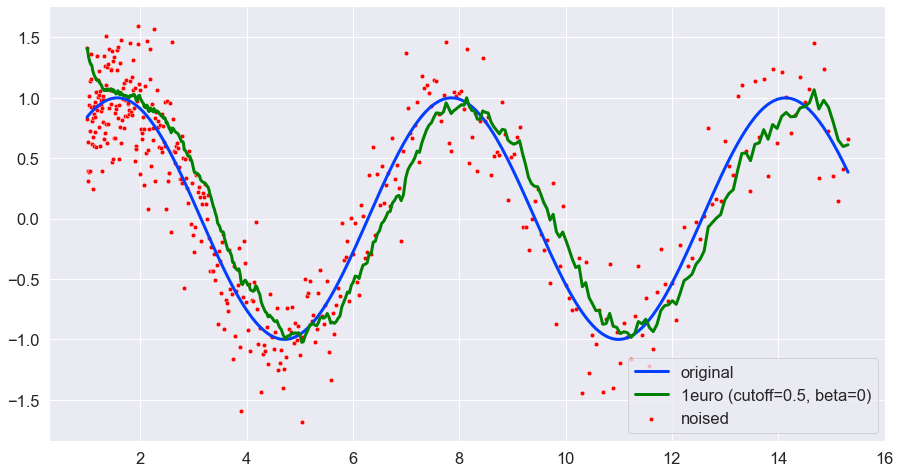

In [42]:
f, ax = plt.subplots(figsize=(15,8))
ax = sns.lineplot(x=linspace, y=original_function, linewidth=3, label='original')
ax1 = sns.scatterplot(linspace, noised_func, s=20, color='red', label='noised')
ax2 = sns.lineplot(x=linspace, y=result, color='green', linewidth=3, 
                   label=f'1euro (cutoff={cutoff}, beta={beta})')